In [1]:
import torch

import numpy as np

from src.model.models import VAE, Diffusion, Flow, DBModelSmall
from src.data.generators import get_moons_dataset
from src.data.samplers import sample_vae, sample_diffusion, sample_flow
from src.visualization.visualize import plot_decision_boundary

from src.data.datasets import ModelParamsDataset
from src.data.helpers import get_accuracy, find_closest_vectors
from src.model.models import DBModelSmall, VAE

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import timeit

In [2]:
plt.rcParams.update({'font.size': 16})

## Sampling

### Variational Autoencoder

In [3]:
model = VAE()
model.load_state_dict(torch.load("../models/autoencoders/vae_dbloss_aligned/vae.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

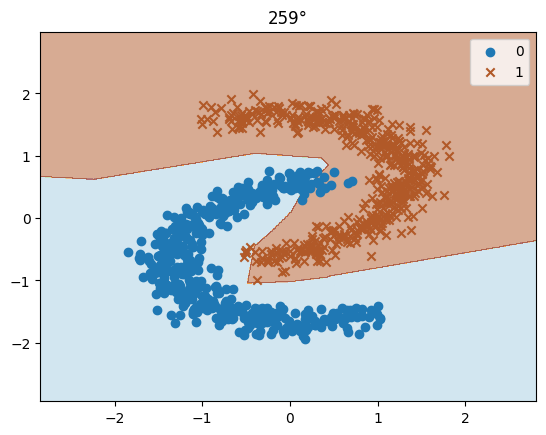

In [17]:
angle = np.random.randint(0, 360)
params = sample_vae(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°")

### Diffusion

In [3]:
model = Diffusion()
model.load_state_dict(torch.load("../models/generators/diffusion/diffusion_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

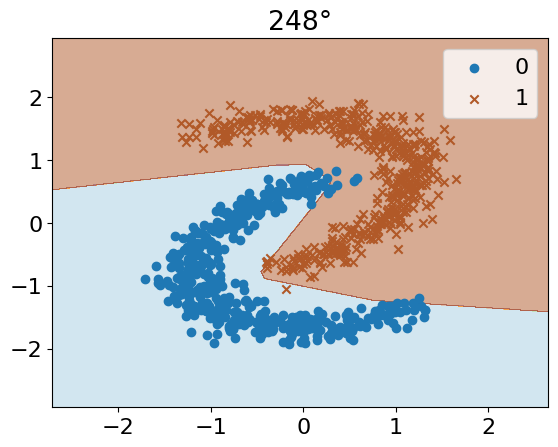

In [4]:
angle = np.random.randint(0, 360)
params = sample_diffusion(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°")

### Flow Matching

In [2]:
model = Flow()
model.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

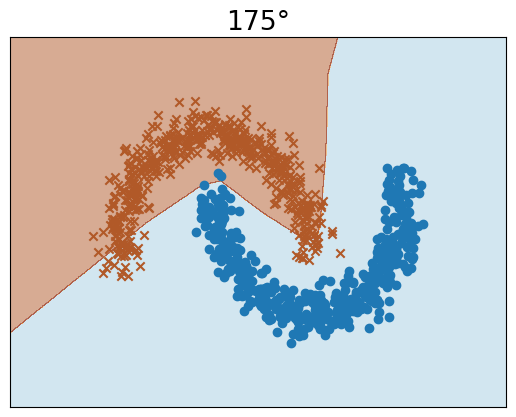

In [15]:
angle = np.random.randint(0, 360)
params = sample_flow(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°", axis=False, legend=False)

## Distribution

### Variational Autoencoder

In [3]:
model = VAE()
model.load_state_dict(torch.load("../models/autoencoders/vae_dbloss_aligned/vae.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

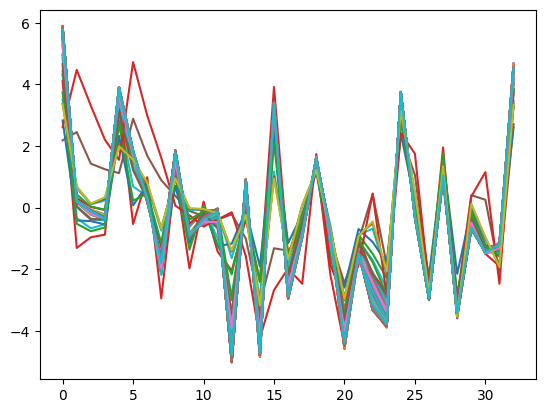

In [10]:
samples = 100
angle = 0

generated_params = []
for i in range(samples):
    params = sample_vae(model, angle)
    generated_params.append(params.detach().numpy())
    plt.plot(params.detach().numpy())

plt.show()

### Diffusion

In [11]:
model = Diffusion()
model.load_state_dict(torch.load("../models/generators/diffusion/diffusion_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

  0%|          | 0/100 [00:00<?, ?it/s]

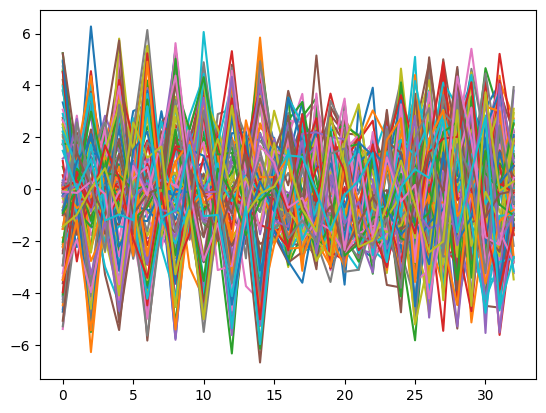

In [13]:
samples = 100
angle = 0

generated_params = []
for i in tqdm(range(samples)):
    params = sample_diffusion(model, angle)
    generated_params.append(params.detach().numpy())
    plt.plot(params.detach().numpy())

plt.show()

### Flow Matching

In [15]:
model = Flow()
model.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

  0%|          | 0/100 [00:00<?, ?it/s]

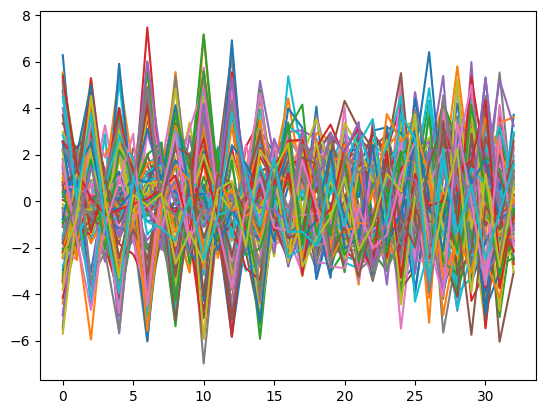

In [16]:
samples = 100
angle = 0

generated_params = []
for i in tqdm(range(samples)):
    params = sample_flow(model, angle)
    generated_params.append(params.detach().numpy())
    plt.plot(params.detach().numpy())

plt.show()

## Accuracy

In [ ]:
classifier = DBModelSmall(batch_first=False)
classifier.eval()

dataset = ModelParamsDataset("../data/zoo_small.csv")

### Variation Autoencoder

Model: ../models/autoencoders/vae_dbloss_aligned/vae_10spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 2.724459899996873
Mean accuracy: 79.49887500000001
Standard deviation: 8.593332370761356
The distance in set: 2.832614302635193 0.7159800252129159
The distance between generated samples and training samples: 7.686703383922577 0.5998049338918644
Model: ../models/autoencoders/vae_dbloss_aligned/vae_100spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 2.6706742999958806
Mean accuracy: 87.4625
Standard deviation: 2.8674237130218496
The distance in set: 3.331889808177948 1.0649123754633316
The distance between generated samples and training samples: 7.3778820633888245 0.22346454503615928
Model: ../models/autoencoders/vae_dbloss_aligned/vae_1000spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 2.73849129996961
Mean accuracy: 98.47574999999999
Standard deviation: 5.059084594815548
The distance in set: 3.0488083362579346 0.7567743626913338
The distance between generated samples and training samples: 9.41176050901413 0.9536020440956027
Model: ../models/autoencoders/vae_dbloss_aligned/vae.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 3.0007865999941714
Mean accuracy: 99.4445
Standard deviation: 2.087622990388831
The distance in set: 2.3931474685668945 0.9129564097073322
The distance between generated samples and training samples: 8.464353621006012 1.1016905137307305


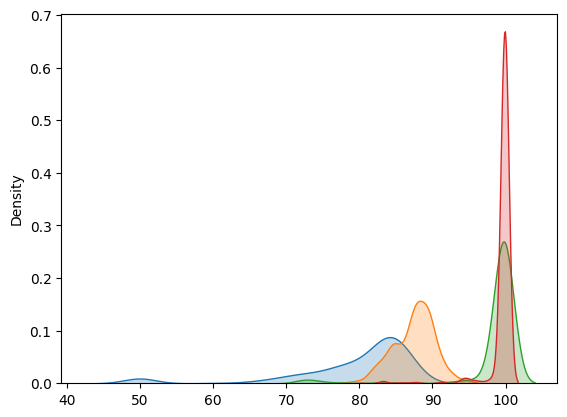

In [16]:
indexes = ["_10spa", "_100spa", "_1000spa", ""]
angles = [0, 45, 90, 135, 180, 225, 270, 315]
samples_per_angle = 100

for index in indexes:
    model_path = f"../models/autoencoders/vae_dbloss_aligned/vae{index}.pth"

    model = VAE(33, 2, 0.2)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    accuracies = []
    generated_parameters = []

    torch.manual_seed(42)

    print("Model:", model_path)
    start_time = timeit.default_timer()
    with torch.no_grad():
        for angle in tqdm(angles):
            good_parameters = []
            for i in range(samples_per_angle):
                sample = sample_vae(model, angle)

                X, y = get_moons_dataset(angle)
                X = torch.tensor(X, dtype=torch.float32)

                classifier.set_weights(sample)
                accuracy = get_accuracy(classifier, X, y)
                accuracies.append(accuracy)
                if(accuracy > 80):
                    good_parameters.append(sample)
            
            generated_parameters.append(good_parameters)

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time to generate {samples_per_angle*len(angles)} samples:", elapsed_time)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        dists = torch.cdist(params, params)
        average_dist = torch.mean(dists)
        average_distances.append(average_dist.item())

    set_distances_mean = np.mean(average_distances)
    set_distances_std = np.std(average_distances)

    train_params = []
    for params, angle in dataset:
        train_params.append(params)
    train_params = torch.stack(train_params)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        closest_vals,_ = find_closest_vectors(params, train_params)
        average = torch.mean(closest_vals)
        average_distances.append(average.item())

    closest_distances_mean = np.mean(average_distances)
    closest_distances_std = np.std(average_distances)

    print("Mean accuracy:", np.mean(accuracies))
    print("Standard deviation:", np.std(accuracies))
    print("The distance in set:", set_distances_mean, set_distances_std)
    print("The distance between generated samples and training samples:", closest_distances_mean, closest_distances_std)
    sns.kdeplot(accuracies, fill=True)

### Diffusion

In [ ]:
indexes = ["_10spa", "_100spa", "_1000spa", ""]
angles = [0, 45, 90, 135, 180, 225, 270, 315]
samples_per_angle = 100

for index in indexes:
    model_path = f"../models/generators/diffusion/diffusion_conditional{index}.pth"
    model = Diffusion()
    model.load_state_dict(torch.load(model_path))
    model.eval()

    accuracies = []
    generated_parameters = []

    torch.manual_seed(42)

    print("Model:", model_path)
    start_time = timeit.default_timer()
    with torch.no_grad():
        for angle in tqdm(angles):
            good_parameters = []
            for i in range(samples_per_angle):
                sample = sample_diffusion(model, angle)

                X, y = get_moons_dataset(angle)
                X = torch.tensor(X, dtype=torch.float32)

                classifier.set_weights(sample)
                accuracy = get_accuracy(classifier, X, y)
                accuracies.append(accuracy)
                if(accuracy > 80):
                    good_parameters.append(sample)
            
            generated_parameters.append(good_parameters)

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time to generate {samples_per_angle*len(angles)} samples:", elapsed_time)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        dists = torch.cdist(params, params)
        average_dist = torch.mean(dists)
        average_distances.append(average_dist.item())

    set_distances_mean = np.mean(average_distances)
    set_distances_std = np.std(average_distances)

    train_params = []
    for params, angle in dataset:
        train_params.append(params)
    train_params = torch.stack(train_params)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        closest_vals,_ = find_closest_vectors(params, train_params)
        average = torch.mean(closest_vals)
        average_distances.append(average.item())

    closest_distances_mean = np.mean(average_distances)
    closest_distances_std = np.std(average_distances)

    print("Mean accuracy:", np.mean(accuracies))
    print("Standard deviation:", np.std(accuracies))
    print("The distance in set:", set_distances_mean, set_distances_std)
    print("The distance between generated samples and training samples:", closest_distances_mean, closest_distances_std)
    sns.kdeplot(accuracies, fill=True)

### Flow Matching

Model: ../models/generators/flow_matching/flow_conditional_10spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 27.548775899980683
Mean accuracy: 92.29387500000001
Standard deviation: 9.976105201148142
The distance in set: 14.102004885673523 0.7475932789309969
The distance between generated samples and training samples: 3.3450796008110046 0.15519541956707028
Model: ../models/generators/flow_matching/flow_conditional_100spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 27.47201369999675
Mean accuracy: 85.43112500000001
Standard deviation: 11.347235070023665
The distance in set: 14.588876843452454 0.5035398809398051
The distance between generated samples and training samples: 5.919060587882996 0.25126370961191186
Model: ../models/generators/flow_matching/flow_conditional_1000spa.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 27.923303799994756
Mean accuracy: 89.22375
Standard deviation: 10.640755891265432
The distance in set: 16.613593578338623 0.46138113088206356
The distance between generated samples and training samples: 6.995941936969757 0.13073699639195888
Model: ../models/generators/flow_matching/flow_conditional.pth


  0%|          | 0/8 [00:00<?, ?it/s]

Time to generate 800 samples: 27.864689600013662
Mean accuracy: 91.931625
Standard deviation: 9.397252915579903
The distance in set: 17.282466888427734 0.4324105602335279
The distance between generated samples and training samples: 7.146001935005188 0.1369226474865723


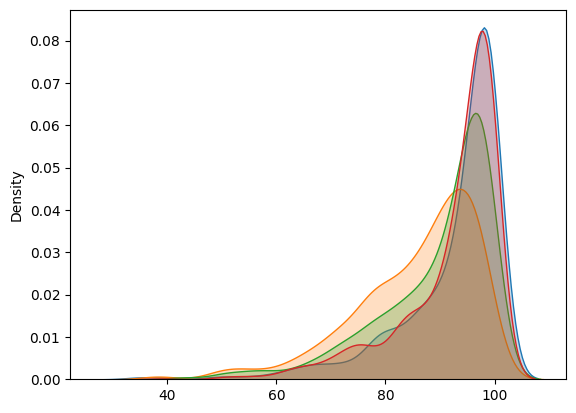

In [20]:
indexes = ["_10spa", "_100spa", "_1000spa", ""]
angles = [0, 45, 90, 135, 180, 225, 270, 315]
samples_per_angle = 100

for index in indexes:
    model_path = f"../models/generators/flow_matching/flow_conditional{index}.pth"
    model = Flow()
    model.load_state_dict(torch.load(model_path))
    model.eval()

    accuracies = []
    generated_parameters = []

    torch.manual_seed(42)

    print("Model:", model_path)
    start_time = timeit.default_timer()
    with torch.no_grad():
        for angle in tqdm(angles):
            good_parameters = []
            for i in range(samples_per_angle):
                sample = sample_flow(model, angle)

                X, y = get_moons_dataset(angle)
                X = torch.tensor(X, dtype=torch.float32)
                
                classifier.set_weights(sample)
                accuracy = get_accuracy(classifier, X, y)
                accuracies.append(accuracy)
                if(accuracy > 80):
                    good_parameters.append(sample)
            
            generated_parameters.append(good_parameters)

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time to generate {samples_per_angle*len(angles)} samples:", elapsed_time)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        dists = torch.cdist(params, params)
        average_dist = torch.mean(dists)
        average_distances.append(average_dist.item())

    set_distances_mean = np.mean(average_distances)
    set_distances_std = np.std(average_distances)

    train_params = []
    for params, angle in dataset:
        train_params.append(params)
    train_params = torch.stack(train_params)

    average_distances = []
    for params in generated_parameters:
        params = torch.stack(params)
        closest_vals,_ = find_closest_vectors(params, train_params)
        average = torch.mean(closest_vals)
        average_distances.append(average.item())

    closest_distances_mean = np.mean(average_distances)
    closest_distances_std = np.std(average_distances)

    print("Mean accuracy:", np.mean(accuracies))
    print("Standard deviation:", np.std(accuracies))
    print("The distance in set:", set_distances_mean, set_distances_std)
    print("The distance between generated samples and training samples:", closest_distances_mean, closest_distances_std)
    sns.kdeplot(accuracies, fill=True)